# Config

In [ ]:
!pip install fastf1

In [ ]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")    # clave
import random
import requests

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Set the cache directory (need a 'cache' folder) avoid long waiting times
ff1.Cache.enable_cache('/content/drive/MyDrive/F1/cache')

In [ ]:
# Load the session
session = ff1.get_session(2023, 'Japan', 'R')
session.load()
laps = session.laps

# Plot - Driver Standings 2023

Only change the variable ***rounds*** and ***title GP***

In [ ]:
def ergast_retrieve(api_endpoint: str):
    url = f'https://ergast.com/api/f1/{api_endpoint}.json'
    response = requests.get(url).json()

    return response['MRData']

In [ ]:
# Current round
rounds = 16

# Empty dataframe to store our data
all_championship_standings = pd.DataFrame()

# We also want to store which driver drives for which team, which will help us later
driver_team_mapping = {}

# Initate a loop through all the rounds
for i in range(1, rounds + 1):
    # Make request to driverStandings endpoint for the current round
    race = ergast_retrieve(f'current/{i}/driverStandings')

    # Get the standings from the result
    standings = race['StandingsTable']['StandingsLists'][0]['DriverStandings']

    # Initiate a dictionary to store the current rounds' standings in
    current_round = {'round': i}

    # Loop through all the drivers to collect their information
    for i in range(len(standings)):
        driver = standings[i]['Driver']['code']
        position = standings[i]['position']

        # Store the drivers' position
        current_round[driver] = int(position)

        # Create mapping for driver-team to be used for the coloring of the lines
        driver_team_mapping[driver] = standings[i]['Constructors'][0]['name']

    # Append the current round to our fial dataframe
    all_championship_standings = all_championship_standings.append(current_round, ignore_index=True)

# Set the round as the index of the dataframe
all_championship_standings = all_championship_standings.set_index('round')

In [ ]:
# Melt data so it can be used as input for plot
driver_standings = pd.melt(all_championship_standings.reset_index(), ['round'])

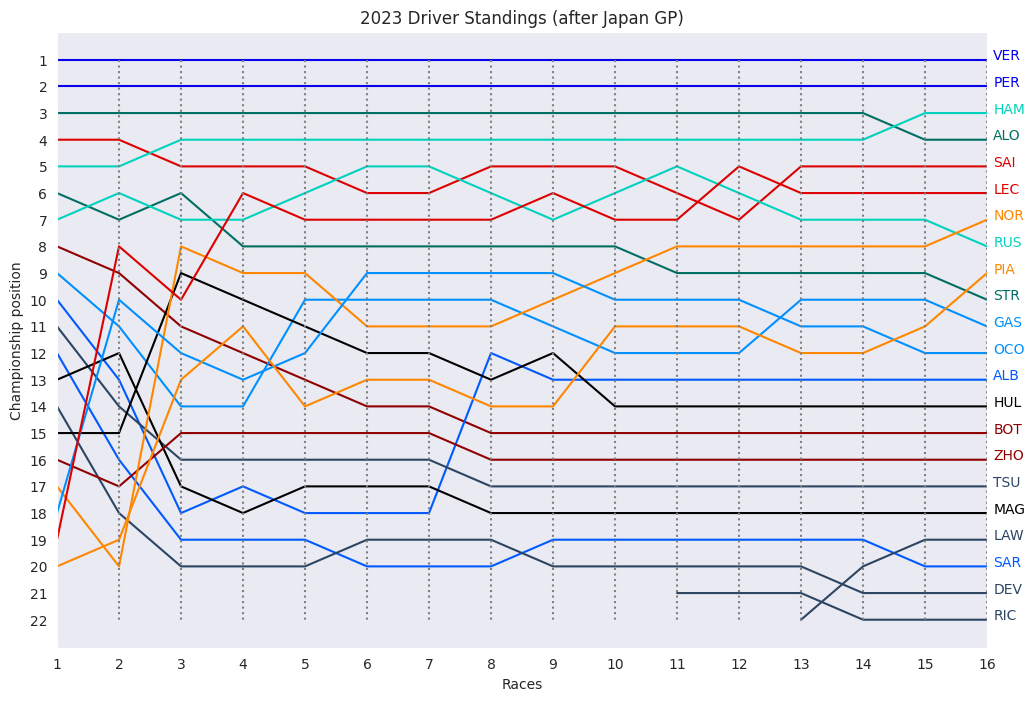

In [ ]:
# Initiate the plot
fig, ax = plt.subplots(figsize=(12, 8))
#sns.set(style="darkgrid")

# Set the title of the plot
ax.set_title("2023 Driver Standings (after Japan GP)")

colores_personalizados = {'HUL': 'black', 'MAG': 'black'}

# Draw a line for every driver in the data by looping through all the standings
for driver in pd.unique(driver_standings['variable']):
    data_driver = driver_standings.loc[driver_standings['variable'] == driver]
    color = colores_personalizados.get(driver, None)

    if color is None:
        sns.lineplot(x='round', y='value', data=data_driver, color=ff1.plotting.team_color(driver_team_mapping[driver]), ax=ax)
    else:
        sns.lineplot(x='round', y='value', data=data_driver, color=color, ax=ax)

# Invert Y-axis to have championship leader (#1) on top
ax.invert_yaxis()

# Set the values and limits that appear on the x- and y-axes
ax.set_xticks(range(1, rounds+1))
ax.set_yticks(range(1, 23))    # This year: 20 drivers + 2 AT
ax.set_xlim(1, rounds)

# Set the labels of the axes
ax.set_xlabel("Races")
ax.set_ylabel("Championship position")

# Disable the gridlines
ax.grid(False)

# Add the driver name to the lines
for line, name in zip(ax.lines, all_championship_standings.columns.tolist()):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]

    text = ax.annotate(name, xy=(x + 0.1, y), xytext=(0, 0), color=line.get_color(),
                       xycoords=(ax.get_xaxis_transform(), ax.get_yaxis_transform()), textcoords="offset points")

# Draw vertical lines behind the bars
for x_value in range(1, rounds + 1):
    ax.vlines(x=x_value, ymin=1, ymax=22, linestyles='dotted', colors='grey')

#plt.savefig(f"/content/drive/MyDrive/F1/16. Japon (Suzuka) 23/Fotos/driver_standing.png", dpi=500)

plt.show()

# Plot - Teammate QUALIFYING comparison

Only change wins, max in Y, name GP

In [ ]:
rbr_color = ff1.plotting.team_color('red bull')
mer_color = ff1.plotting.team_color('mercedes')
fer_color = ff1.plotting.team_color('ferrari')
am_color = ff1.plotting.team_color('aston martin')
mcl_color = ff1.plotting.team_color('mclaren')
alp_color = ff1.plotting.team_color('alpine')
wil_color = ff1.plotting.team_color('williams')
haas_color = ff1.plotting.team_color('haas')
ar_color = ff1.plotting.team_color('alfa romeo')
at_color = ff1.plotting.team_color('alphatauri')

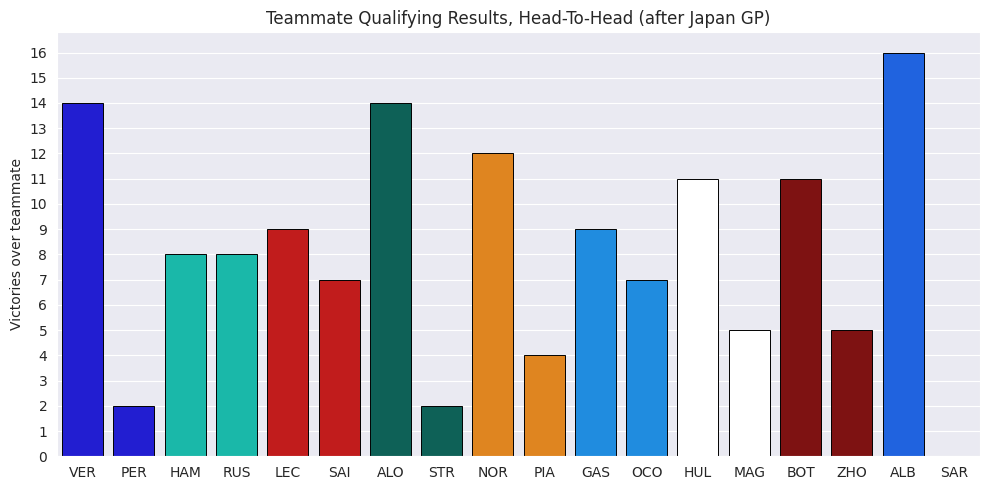

In [ ]:
drivers = ['VER', 'PER', 'HAM', 'RUS', 'LEC', 'SAI', 'ALO', 'STR', 'NOR', 'PIA', 'GAS', 'OCO', 'HUL', 'MAG', 'BOT', 'ZHO', 'ALB', 'SAR']
qualy_wins = [14, 2, 8, 8, 9, 7, 14, 2, 12, 4, 9, 7, 11, 5, 11, 5, 16, 0]

colors = [rbr_color, rbr_color, mer_color, mer_color, fer_color, fer_color, am_color, am_color, mcl_color,
           mcl_color, alp_color, alp_color, haas_color, haas_color, ar_color, ar_color, wil_color, wil_color]

#sns.set(style="darkgrid")

plt.figure(figsize=(10, 5))
sns.barplot(x=drivers, y=qualy_wins, palette=colors, linewidth=0.7, edgecolor='black')

plt.title('Teammate Qualifying Results, Head-To-Head (after Japan GP)')
plt.ylabel('Victories over teammate')
plt.yticks(np.arange(0, 17))    # maximo H2H + 1

plt.tight_layout()

#plt.savefig(f"/content/drive/MyDrive/F1/16. Japon (Suzuka) 23/Fotos/quali_h2h.png", dpi=500)

plt.show()

# Plot - Teammate RACE comparison

Only change wins, max in Y, name GP

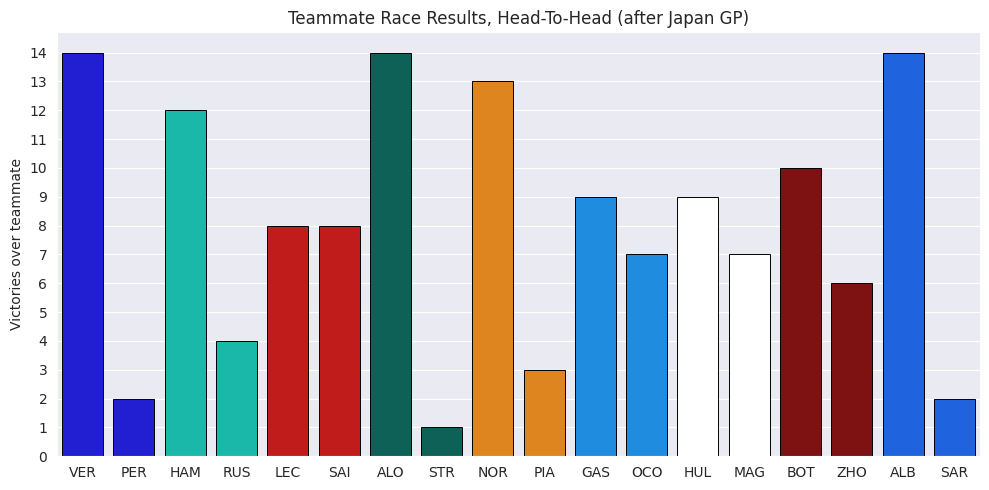

In [ ]:
drivers = ['VER', 'PER', 'HAM', 'RUS', 'LEC', 'SAI', 'ALO', 'STR', 'NOR', 'PIA', 'GAS', 'OCO', 'HUL', 'MAG', 'BOT', 'ZHO', 'ALB', 'SAR']
qualy_wins = [14, 2, 12, 4, 8, 8, 14, 1, 13, 3, 9, 7, 9, 7, 10, 6, 14, 2]   #Stroll didn't take part in Singapore

colors = [rbr_color, rbr_color, mer_color, mer_color, fer_color, fer_color, am_color, am_color, mcl_color,
           mcl_color, alp_color, alp_color, haas_color, haas_color, ar_color, ar_color, wil_color, wil_color]

#sns.set(style="darkgrid")

plt.figure(figsize=(10, 5))
sns.barplot(x=drivers, y=qualy_wins, palette=colors, linewidth=0.7, edgecolor='black')

plt.title('Teammate Race Results, Head-To-Head (after Japan GP)')
plt.ylabel('Victories over teammate')
plt.yticks(np.arange(0, 15))

plt.tight_layout()

#plt.savefig(f"/content/drive/MyDrive/F1/16. Japon (Suzuka) 23/Fotos/race_h2h.png", dpi=500)

plt.show()

# Plot - Position changes during a race


In [ ]:
#ff1.plotting.setup_mpl(misc_mpl_mods=False)

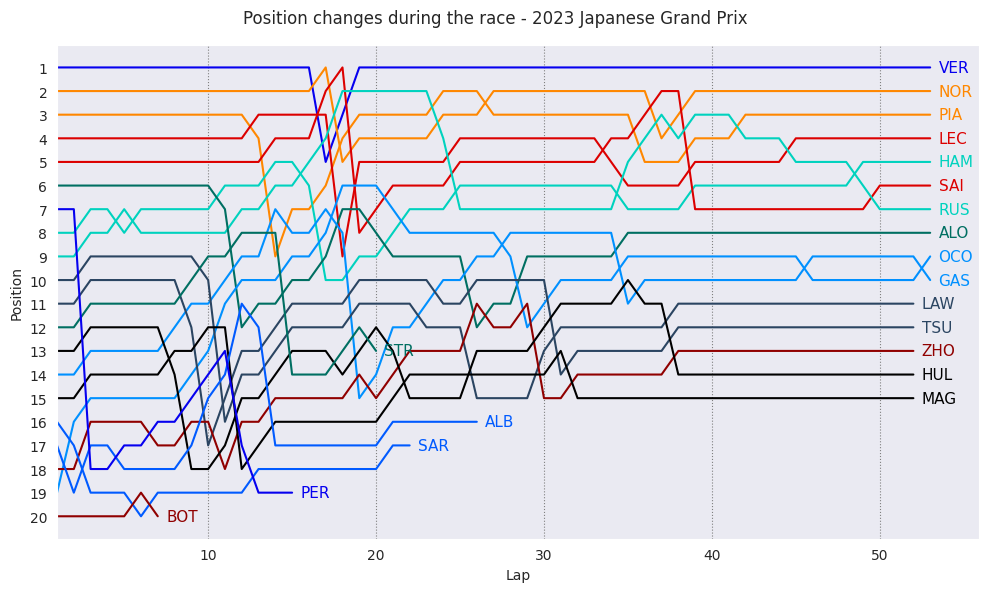

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
#sns.set(style="darkgrid")

plt.suptitle(f"Position changes during the race - {session.event.year} {session.event.EventName}")

# Get abbreviation names y luego plot their position over the number of laps.
for driver in session.drivers:
    driver_laps = session.laps.pick_driver(driver)

    team = driver_laps['Team'].iloc[0]  # or 'Driver' (their colors)
    driver_abb = driver_laps['Driver'].iloc[0]

    # Especific colors
    if driver_abb == 'HUL' or driver_abb == 'MAG':
        color = 'black'
    else:
        color = ff1.plotting.team_color(team)

    ax.plot(driver_laps['LapNumber'], driver_laps['Position'], label=driver_abb, color=color)

    # Add drivers name at the end of the line
    final_position = driver_laps['Position'].iloc[-1]
    final_lap = driver_laps['LapNumber'].iloc[-1]
    ax.annotate(driver_abb, (final_lap + 0.5, final_position), color=color, va='center', fontsize=11)

# Some settings
ax.invert_yaxis()
ax.set_xlabel('Lap')
ax.set_ylabel('Position')
ax.set_yticks(range(1, 21))
ax.set_xlim(1, max(laps['LapNumber']) + 2.9)  # If an end line appears, change this

# Disable the gridlines
ax.grid(False)

# Draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='dotted', color='grey')

plt.tight_layout()

#plt.savefig(f"/content/drive/MyDrive/F1/16. Japon (Suzuka) 23/Fotos/position_change_race.png", dpi=500)

plt.show()